In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from logisticregression import RegressaoLogistica
from metricas import acuracia,precisao,revocacao, f1, matriz_confusao


In [2]:


# Carregar o conjunto de dados Iris
iris = pd.read_csv("iris.csv")

iris['target'] = (iris['species'] == 'setosa').astype(int)

X = iris.iloc[:, [2, 3]].values
y = iris['target'].values.reshape(-1, 1)


In [3]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Normalizar os dados de treinamento
escala = MinMaxScaler()
X_normalizado_treino = escala.fit_transform(X_treino)

# Normalizar os dados de teste
X_normalizado_teste = escala.transform(X_teste)

In [5]:

# Treinar o modelo de regressão logística
modelo = RegressaoLogistica(a=0.01, epocas=2000)
modelo.fit_gd(X_normalizado_treino, y_treino)
previsao=modelo.predict(X_normalizado_teste)

In [6]:
acuracia = acuracia(y_teste, previsao)
print("Acurácia:", acuracia)

# plotar a matriz de confusao e trechoude
precisao = precisao(y_teste, previsao, classe_positiva=1)
print("Precisão:", precisao)

revocacao = revocacao(y_teste, previsao, classe_positiva=1)
print("Revocação:", revocacao)

f1 = f1(precisao, revocacao)
print("F1:", f1)

conf_matrix = matriz_confusao(y_teste.flatten(), previsao, num_classes=2)
print("Matriz de Confusão:")
for row in conf_matrix:
    print(row)

Acurácia: 1.0
Precisão: 1.0
Revocação: 1.0
F1: 1.0
Matriz de Confusão:
[20, 0]
[0, 10]


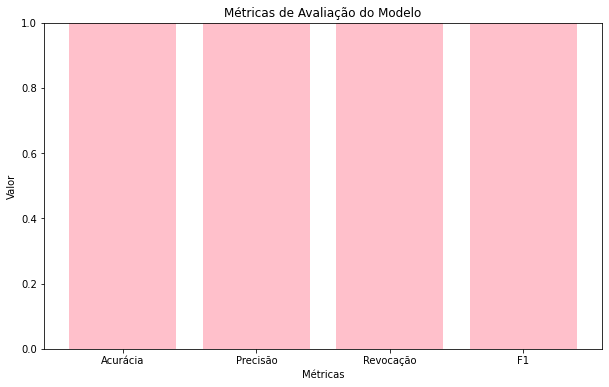

In [7]:

# Métricas
metricas = ['Acurácia', 'Precisão', 'Revocação', 'F1']
valores = [acuracia, precisao, revocacao, f1]

# Plotagem
plt.figure(figsize=(10, 6))
plt.bar(metricas, valores, color='pink')
plt.title('Métricas de Avaliação do Modelo')
plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.show()


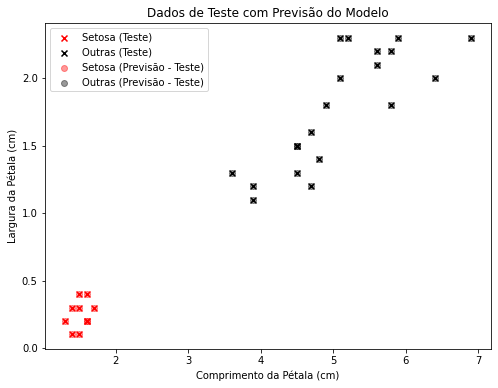

In [8]:
# Função para plotar apenas os pontos de teste com previsão do modelo
def plot_test_points_with_predictions(X_test, y_test, y_pred_test):
    plt.figure(figsize=(8, 6))  # Definindo o tamanho do gráfico
    
    plt.scatter(X_test[y_teste.flatten() == 1, 0], X_test[y_teste.flatten() == 1, 1], c='red', marker='x', label='Setosa (Teste)')
    plt.scatter(X_test[y_teste.flatten() == 0, 0], X_test[y_teste.flatten() == 0, 1], c='black', marker='x', label='Outras (Teste)')

    
    plt.scatter(X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1], c='red', marker='o', alpha=0.4, label='Setosa (Previsão - Teste)')
    plt.scatter(X_test[y_pred_test == 0, 0], X_test[y_pred_test == 0, 1], c='black', marker='o', alpha=0.4, label='Outras (Previsão - Teste)')


    plt.xlabel('Comprimento da Pétala (cm)')
    plt.ylabel('Largura da Pétala (cm)')
    plt.title('Dados de Teste com Previsão do Modelo')
    plt.legend()
    plt.show()


# Plotar apenas os pontos de teste com previsão do modelo
plot_test_points_with_predictions(X_teste, y_teste.flatten(), previsao)
